In [246]:
import libpysal
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import shapely
from sklearn.metrics import pairwise as skm
import spopt
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal
from sklearn.impute import SimpleImputer

In [247]:
lga = "LGA_2023_AUST_GDA2020/LGA_2023_AUST_GDA2020.shp"
lga = gpd.read_file(lga)
lga = lga.loc[lga.is_valid]
#print(lga)
lga.head()
#lga.plot()

LGA_CODE23 LGA_NAME23 STE_CODE21       STE_NAME21 AUS_CODE21 AUS_NAME21  \
0      10050     Albury          1  New South Wales        AUS  Australia   
1      10180   Armidale          1  New South Wales        AUS  Australia   
2      10250    Ballina          1  New South Wales        AUS  Australia   
3      10300  Balranald          1  New South Wales        AUS  Australia   
4      10470   Bathurst          1  New South Wales        AUS  Australia   

     AREASQKM                                         LOCI_URI21  \
0    305.6386  https://linked.data.gov.au/dataset/asgsed3/LGA...   
1   7809.4406  https://linked.data.gov.au/dataset/asgsed3/LGA...   
2    484.9692  https://linked.data.gov.au/dataset/asgsed3/LGA...   
3  21690.7493  https://linked.data.gov.au/dataset/asgsed3/LGA...   
4   3817.8645  https://linked.data.gov.au/dataset/asgsed3/LGA...   

                                            geometry  
0  POLYGON ((146.86566 -36.07292, 146.86512 -36.0...  
1  POLYGON ((152.38816 -30.52639, 152.38812 -30.5...  
2  MULTIPOLYGON (((153.57106 -28.87381, 153.57106...  
3  POLYGON ((143.00433 -33.78164, 143.01538 -33.7...  
4  POLYGON ((149.84877 -33.52784, 149.84864 -33.5...

<Axes: >

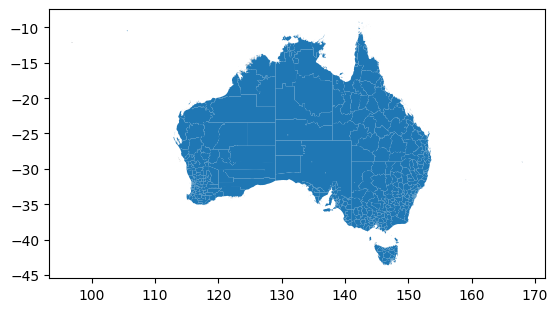

In [248]:
lga = lga.reset_index(drop=True)
#print(lga)
lga.plot()

In [251]:
rt_2020 = 'business/rt_2020.xlsx'
acc_2020 = 'business/acc_2020.xlsx'
rt_2021 = 'business/rt_2021.xlsx'
acc_2021 = 'business/acc_2021.xlsx'
rt_2022 = 'business/rt_2022.xlsx'
acc_2022 = 'business/acc_2022.xlsx'

# Read the Excel file into a pandas DataFrame
rt_2020 = pd.read_excel(rt_2020, engine='openpyxl')
acc_2020 = pd.read_excel(acc_2020, engine='openpyxl')
rt_2021 = pd.read_excel(rt_2021, engine='openpyxl')
acc_2021 = pd.read_excel(acc_2021, engine='openpyxl')
rt_2022 = pd.read_excel(rt_2022, engine='openpyxl')
acc_2022 = pd.read_excel(acc_2022, engine='openpyxl')

rt_2020 = pd.DataFrame(rt_2020)
acc_2020 = pd.DataFrame(acc_2020)
rt_2021 = pd.DataFrame(rt_2021)
acc_2021 = pd.DataFrame(acc_2021)
rt_2022 = pd.DataFrame(rt_2022)
acc_2022 = pd.DataFrame(acc_2022)

lga['LGA_CODE23']=lga['LGA_CODE23'].astype(int)


In [282]:
rt_2020_lga = lga.merge(rt_2020, on='LGA_CODE23', how='left')
acc_2020_lga = lga.merge(rt_2020, on='LGA_CODE23', how='left')
rt_2021_lga = lga.merge(rt_2020, on='LGA_CODE23', how='left')
acc_2021_lga = lga.merge(rt_2020, on='LGA_CODE23', how='left')
rt_2022_lga = lga.merge(rt_2020, on='LGA_CODE23', how='left')
acc_2022_lga = lga.merge(rt_2020, on='LGA_CODE23', how='left')

In [283]:
rt_2020_lga = rt_2020_lga.fillna(0)
acc_2020_lga = acc_2020_lga.fillna(0)
rt_2021_lga = rt_2021_lga.fillna(0)
acc_2021_lga = acc_2021_lga.fillna(0)
rt_2022_lga = rt_2022_lga.fillna(0)
acc_2022_lga = acc_2022_lga.fillna(0)

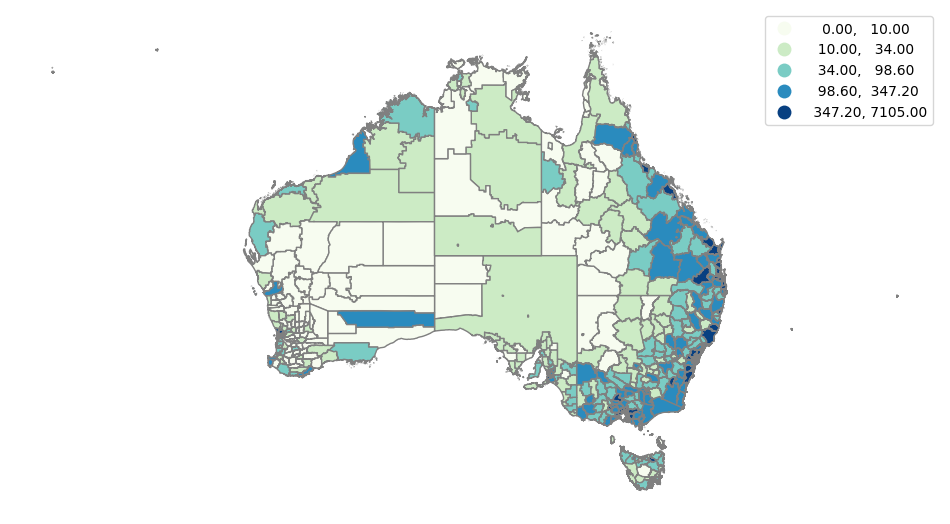

In [266]:
rt_2020_lga.plot(
    figsize=(12, 24),
    column="Total",
    scheme="Quantiles",
    cmap="GnBu",
    edgecolor="grey",
    legend=True
).axis("off");

In [292]:
spanning_forest_kwds = dict(
    dissimilarity=skm.manhattan_distances,
    affinity=None,
    reduction=numpy.sum,
    center=numpy.mean,
    verbose=2
)

Computing Affinity Kernel took 0.00s
Computing initial MST took 0.01s
Computing connected components took 0.00s.


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 256, 263, 278, 310, 382, 385, 507, 514, 539.
  warnings.warn(message)
E:\Uni\research\venv\lib\site-packages\spopt\region\skater.py:537: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 20 to 32 in order to account for islands.
  model.fit(


finding cut...:   0%|          | 0/535 [00:00<?, ?it/s]

making cut deletion(in_node=132, out_node=185, score=128955.19907407407)...


finding cut...:   0%|          | 0/534 [00:00<?, ?it/s]

making cut deletion(in_node=20, out_node=21, score=106023.9862708315)...


finding cut...:   0%|          | 0/533 [00:00<?, ?it/s]

making cut deletion(in_node=216, out_node=255, score=95984.15858828297)...


finding cut...:   0%|          | 0/532 [00:00<?, ?it/s]

making cut deletion(in_node=237, out_node=248, score=90216.56433892217)...


finding cut...:   0%|          | 0/531 [00:00<?, ?it/s]

making cut deletion(in_node=260, out_node=274, score=85610.02400762487)...


finding cut...:   0%|          | 0/530 [00:00<?, ?it/s]

making cut deletion(in_node=27, out_node=100, score=81960.82068660132)...


finding cut...:   0%|          | 0/529 [00:00<?, ?it/s]

making cut deletion(in_node=290, out_node=321, score=78344.93182663801)...


finding cut...:   0%|          | 0/528 [00:00<?, ?it/s]

making cut deletion(in_node=419, out_node=446, score=74459.97852574683)...


finding cut...:   0%|          | 0/527 [00:00<?, ?it/s]

making cut deletion(in_node=253, out_node=281, score=71097.57723001513)...


finding cut...:   0%|          | 0/526 [00:00<?, ?it/s]

making cut deletion(in_node=33, out_node=102, score=67718.97223982729)...


finding cut...:   0%|          | 0/525 [00:00<?, ?it/s]

making cut deletion(in_node=56, out_node=105, score=64874.52492799934)...


finding cut...:   0%|          | 0/524 [00:00<?, ?it/s]

making cut deletion(in_node=23, out_node=35, score=63189.28814639014)...


finding cut...:   0%|          | 0/523 [00:00<?, ?it/s]

making cut deletion(in_node=138, out_node=170, score=61541.98814639014)...


finding cut...:   0%|          | 0/522 [00:00<?, ?it/s]

making cut deletion(in_node=363, out_node=472, score=59973.48464988665)...


finding cut...:   0%|          | 0/521 [00:00<?, ?it/s]

making cut deletion(in_node=94, out_node=545, score=58513.972334615704)...


finding cut...:   0%|          | 0/520 [00:00<?, ?it/s]

making cut deletion(in_node=2, out_node=96, score=57147.75804890142)...


finding cut...:   0%|          | 0/519 [00:00<?, ?it/s]

making cut deletion(in_node=130, out_node=183, score=55858.22190033661)...


finding cut...:   0%|          | 0/518 [00:00<?, ?it/s]

making cut deletion(in_node=242, out_node=270, score=54720.22190033661)...


finding cut...:   0%|          | 0/517 [00:00<?, ?it/s]

making cut deletion(in_node=85, out_node=122, score=53648.50483579195)...


finding cut...:   0%|          | 0/516 [00:00<?, ?it/s]

making cut deletion(in_node=22, out_node=103, score=52515.6586819458)...


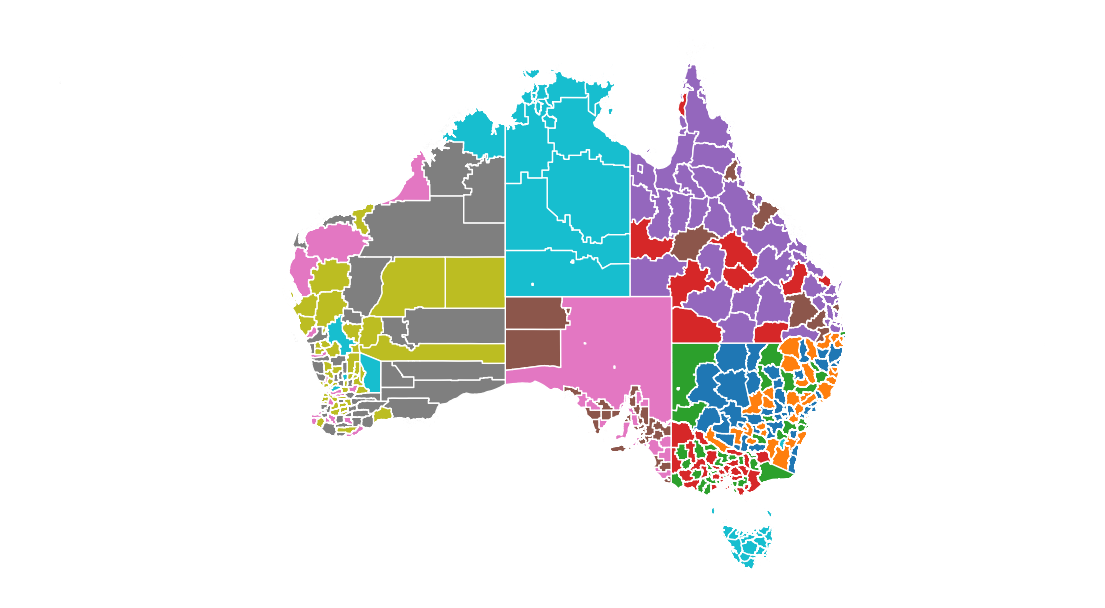

In [293]:
attrs_name=["Total"]
w = libpysal.weights.Queen.from_dataframe(rt_2020_lga)
n_clusters = 20
floor = 1
trace = False
islands = "increase"

model = spopt.region.Skater(
    rt_2020_lga,
    w,
    attrs_name,
    n_clusters=n_clusters,
    floor=floor,
    trace=trace,
    islands=islands,
    spanning_forest_kwds=spanning_forest_kwds
)
model.solve()

rt_2020_lga.plot(figsize=(14, 24), column="LGA_CODE23", categorical=True, edgecolor="w").axis("off");

Computing Affinity Kernel took 0.00s
Computing initial MST took 0.00s
Computing connected components took 0.00s.


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 256, 263, 278, 310, 382, 385, 507, 514, 539.
  warnings.warn(message)
E:\Uni\research\venv\lib\site-packages\spopt\region\skater.py:537: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 20 to 32 in order to account for islands.
  model.fit(


finding cut...:   0%|          | 0/535 [00:00<?, ?it/s]

making cut deletion(in_node=132, out_node=185, score=128955.19907407407)...


finding cut...:   0%|          | 0/534 [00:00<?, ?it/s]

making cut deletion(in_node=20, out_node=21, score=106023.9862708315)...


finding cut...:   0%|          | 0/533 [00:00<?, ?it/s]

making cut deletion(in_node=216, out_node=255, score=95984.15858828297)...


finding cut...:   0%|          | 0/532 [00:00<?, ?it/s]

making cut deletion(in_node=237, out_node=248, score=90216.56433892217)...


finding cut...:   0%|          | 0/531 [00:00<?, ?it/s]

making cut deletion(in_node=260, out_node=274, score=85610.02400762487)...


finding cut...:   0%|          | 0/530 [00:00<?, ?it/s]

making cut deletion(in_node=27, out_node=100, score=81960.82068660132)...


finding cut...:   0%|          | 0/529 [00:00<?, ?it/s]

making cut deletion(in_node=290, out_node=321, score=78344.93182663801)...


finding cut...:   0%|          | 0/528 [00:00<?, ?it/s]

making cut deletion(in_node=419, out_node=446, score=74459.97852574683)...


finding cut...:   0%|          | 0/527 [00:00<?, ?it/s]

making cut deletion(in_node=253, out_node=281, score=71097.57723001513)...


finding cut...:   0%|          | 0/526 [00:00<?, ?it/s]

making cut deletion(in_node=33, out_node=102, score=67718.97223982729)...


finding cut...:   0%|          | 0/525 [00:00<?, ?it/s]

making cut deletion(in_node=56, out_node=105, score=64874.52492799934)...


finding cut...:   0%|          | 0/524 [00:00<?, ?it/s]

making cut deletion(in_node=23, out_node=35, score=63189.28814639014)...


finding cut...:   0%|          | 0/523 [00:00<?, ?it/s]

making cut deletion(in_node=138, out_node=170, score=61541.98814639014)...


finding cut...:   0%|          | 0/522 [00:00<?, ?it/s]

making cut deletion(in_node=363, out_node=472, score=59973.48464988665)...


finding cut...:   0%|          | 0/521 [00:00<?, ?it/s]

making cut deletion(in_node=94, out_node=545, score=58513.972334615704)...


finding cut...:   0%|          | 0/520 [00:00<?, ?it/s]

making cut deletion(in_node=2, out_node=96, score=57147.75804890142)...


finding cut...:   0%|          | 0/519 [00:00<?, ?it/s]

making cut deletion(in_node=130, out_node=183, score=55858.22190033661)...


finding cut...:   0%|          | 0/518 [00:00<?, ?it/s]

making cut deletion(in_node=242, out_node=270, score=54720.22190033661)...


finding cut...:   0%|          | 0/517 [00:00<?, ?it/s]

making cut deletion(in_node=85, out_node=122, score=53648.50483579195)...


finding cut...:   0%|          | 0/516 [00:00<?, ?it/s]

making cut deletion(in_node=22, out_node=103, score=52515.6586819458)...


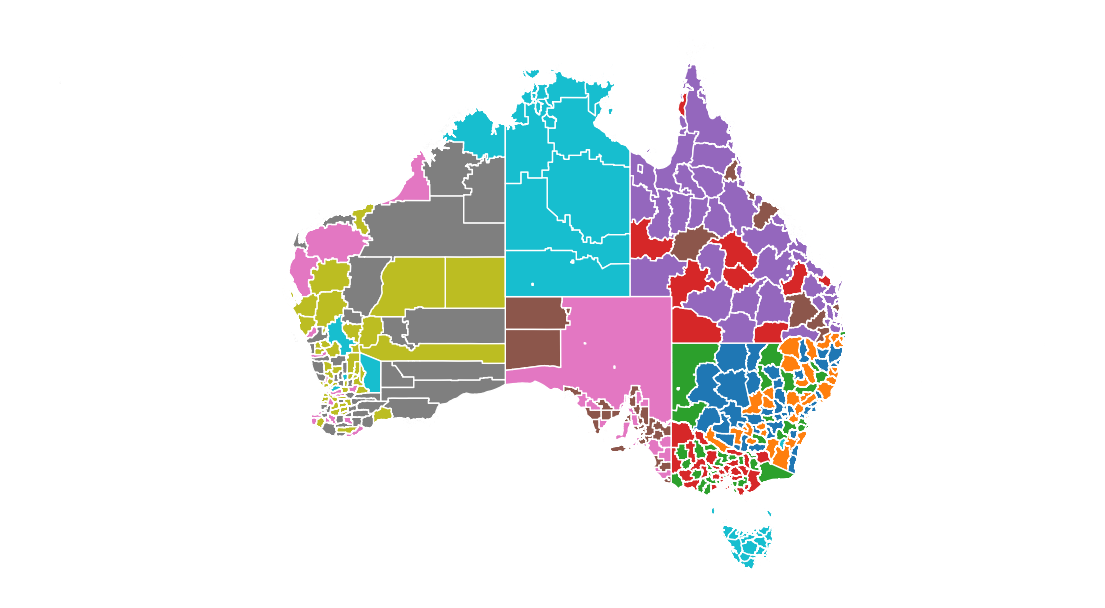

In [295]:
attrs_name=["Total"]
w = libpysal.weights.Queen.from_dataframe(acc_2020_lga)
n_clusters = 20
floor = 1
trace = False
islands = "increase"

model = spopt.region.Skater(
    acc_2020_lga,
    w,
    attrs_name,
    n_clusters=n_clusters,
    floor=floor,
    trace=trace,
    islands=islands,
    spanning_forest_kwds=spanning_forest_kwds
)
model.solve()

acc_2020_lga.plot(figsize=(14, 24), column="LGA_CODE23", categorical=True, edgecolor="w").axis("off");

In [299]:
attrs_name=["Total"]
w = libpysal.weights.Queen.from_dataframe(rt_2021_lga)
n_clusters = 20
floor = 1
trace = False
islands = "increase"

model = spopt.region.Skater(
    rt_2021_lga,
    w,
    attrs_name,
    n_clusters=n_clusters,
    floor=floor,
    trace=trace,
    islands=islands,
    spanning_forest_kwds=spanning_forest_kwds
)
model.solve()

rt_2021_lga.plot(figsize=(14, 24), column="LGA_CODE23", categorical=True, edgecolor="w").axis("off");

Computing Affinity Kernel took 0.00s
Computing initial MST took 0.00s
Computing connected components took 0.00s.


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 256, 263, 278, 310, 382, 385, 507, 514, 539.
  warnings.warn(message)
E:\Uni\research\venv\lib\site-packages\spopt\region\skater.py:537: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 20 to 32 in order to account for islands.
  model.fit(


ValueError: Islands must be larger than the quorum. If not, drop the small islands and solve for clusters in the remaining field.

Computing Affinity Kernel took 0.00s
Computing initial MST took 0.00s
Computing connected components took 0.00s.


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 256, 263, 278, 310, 382, 385, 507, 514, 539.
  warnings.warn(message)
E:\Uni\research\venv\lib\site-packages\spopt\region\skater.py:537: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 5 to 17 in order to account for islands.
  model.fit(


finding cut...:   0%|          | 0/535 [00:00<?, ?it/s]

making cut deletion(in_node=132, out_node=185, score=128955.19907407407)...


finding cut...:   0%|          | 0/534 [00:00<?, ?it/s]

making cut deletion(in_node=20, out_node=21, score=106023.9862708315)...


finding cut...:   0%|          | 0/533 [00:00<?, ?it/s]

making cut deletion(in_node=216, out_node=255, score=95984.15858828297)...


finding cut...:   0%|          | 0/532 [00:00<?, ?it/s]

making cut deletion(in_node=237, out_node=248, score=90216.56433892217)...


finding cut...:   0%|          | 0/531 [00:00<?, ?it/s]

making cut deletion(in_node=260, out_node=274, score=85610.02400762487)...


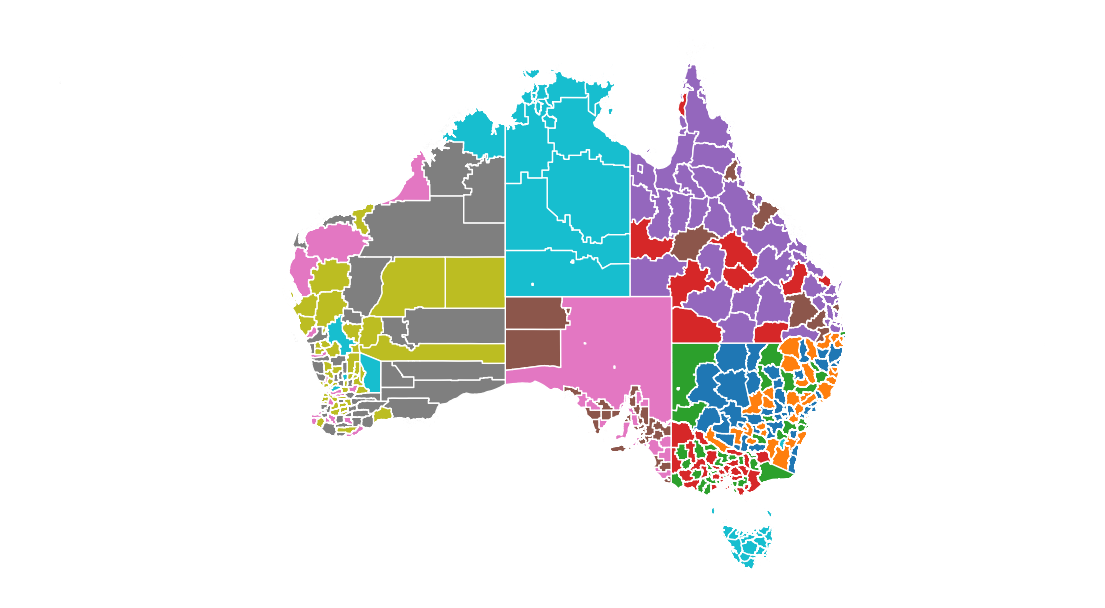

In [289]:
attrs_name=["Total"]
w = libpysal.weights.Queen.from_dataframe(acc_2021_lga)
n_clusters = 5
floor = 1
trace = False
islands = "increase"

model = spopt.region.Skater(
    acc_2021_lga,
    w,
    attrs_name,
    n_clusters=n_clusters,
    floor=floor,
    trace=trace,
    islands=islands,
    spanning_forest_kwds=spanning_forest_kwds
)
model.solve()

acc_2021_lga.plot(figsize=(14, 24), column="LGA_CODE23", categorical=True, edgecolor="w").axis("off");


Computing Affinity Kernel took 0.00s
Computing initial MST took 0.00s
Computing connected components took 0.00s.


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 256, 263, 278, 310, 382, 385, 507, 514, 539.
  warnings.warn(message)
E:\Uni\research\venv\lib\site-packages\spopt\region\skater.py:537: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 20 to 32 in order to account for islands.
  model.fit(


finding cut...:   0%|          | 0/535 [00:00<?, ?it/s]

making cut deletion(in_node=132, out_node=185, score=128955.19907407407)...


finding cut...:   0%|          | 0/534 [00:00<?, ?it/s]

making cut deletion(in_node=20, out_node=21, score=106023.9862708315)...


finding cut...:   0%|          | 0/533 [00:00<?, ?it/s]

making cut deletion(in_node=216, out_node=255, score=95984.15858828297)...


finding cut...:   0%|          | 0/532 [00:00<?, ?it/s]

making cut deletion(in_node=237, out_node=248, score=90216.56433892217)...


finding cut...:   0%|          | 0/531 [00:00<?, ?it/s]

making cut deletion(in_node=260, out_node=274, score=85610.02400762487)...


finding cut...:   0%|          | 0/530 [00:00<?, ?it/s]

making cut deletion(in_node=27, out_node=100, score=81960.82068660132)...


finding cut...:   0%|          | 0/529 [00:00<?, ?it/s]

making cut deletion(in_node=290, out_node=321, score=78344.93182663801)...


finding cut...:   0%|          | 0/528 [00:00<?, ?it/s]

making cut deletion(in_node=419, out_node=446, score=74459.97852574683)...


finding cut...:   0%|          | 0/527 [00:00<?, ?it/s]

making cut deletion(in_node=253, out_node=281, score=71097.57723001513)...


finding cut...:   0%|          | 0/526 [00:00<?, ?it/s]

making cut deletion(in_node=33, out_node=102, score=67718.97223982729)...


finding cut...:   0%|          | 0/525 [00:00<?, ?it/s]

making cut deletion(in_node=56, out_node=105, score=64874.52492799934)...


finding cut...:   0%|          | 0/524 [00:00<?, ?it/s]

making cut deletion(in_node=23, out_node=35, score=63189.28814639014)...


finding cut...:   0%|          | 0/523 [00:00<?, ?it/s]

making cut deletion(in_node=138, out_node=170, score=61541.98814639014)...


finding cut...:   0%|          | 0/522 [00:00<?, ?it/s]

making cut deletion(in_node=363, out_node=472, score=59973.48464988665)...


finding cut...:   0%|          | 0/521 [00:00<?, ?it/s]

making cut deletion(in_node=94, out_node=545, score=58513.972334615704)...


finding cut...:   0%|          | 0/520 [00:00<?, ?it/s]

making cut deletion(in_node=2, out_node=96, score=57147.75804890142)...


finding cut...:   0%|          | 0/519 [00:00<?, ?it/s]

making cut deletion(in_node=130, out_node=183, score=55858.22190033661)...


finding cut...:   0%|          | 0/518 [00:00<?, ?it/s]

making cut deletion(in_node=242, out_node=270, score=54720.22190033661)...


finding cut...:   0%|          | 0/517 [00:00<?, ?it/s]

making cut deletion(in_node=85, out_node=122, score=53648.50483579195)...


finding cut...:   0%|          | 0/516 [00:00<?, ?it/s]

making cut deletion(in_node=22, out_node=103, score=52515.6586819458)...


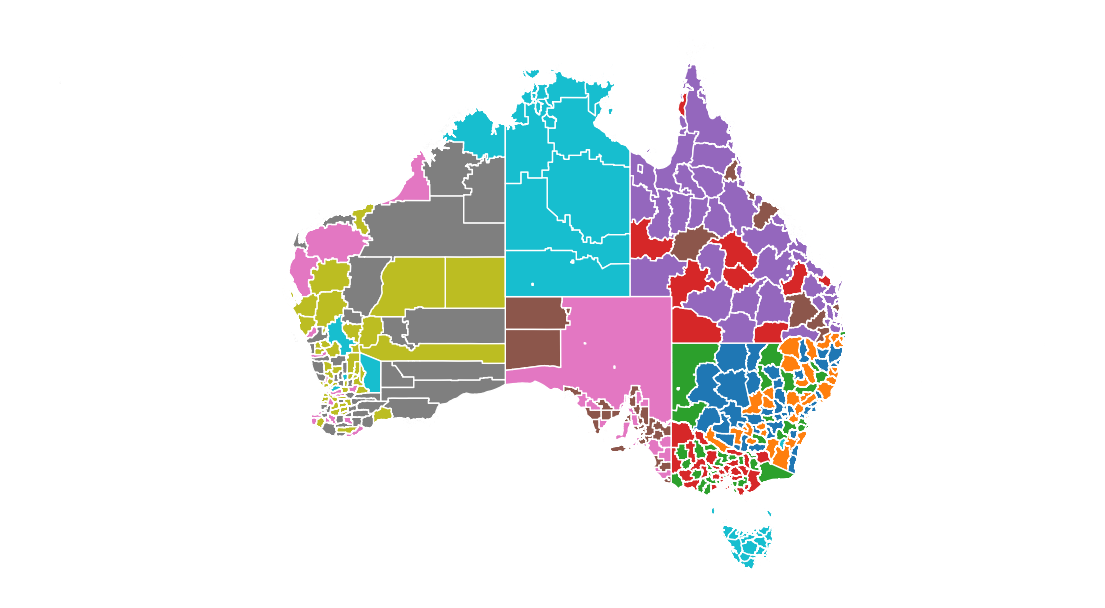

In [297]:
attrs_name=["Total"]
w = libpysal.weights.Queen.from_dataframe(rt_2022_lga)
n_clusters = 20
floor = 1
trace = False
islands = "increase"

model = spopt.region.Skater(
    rt_2022_lga,
    w,
    attrs_name,
    n_clusters=n_clusters,
    floor=floor,
    trace=trace,
    islands=islands,
    spanning_forest_kwds=spanning_forest_kwds
)
model.solve()

rt_2022_lga.plot(figsize=(14, 24), column="LGA_CODE23", categorical=True, edgecolor="w").axis("off");


Computing Affinity Kernel took 0.00s
Computing initial MST took 0.00s
Computing connected components took 0.00s.


E:\Uni\research\venv\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 256, 263, 278, 310, 382, 385, 507, 514, 539.
  warnings.warn(message)
E:\Uni\research\venv\lib\site-packages\spopt\region\skater.py:537: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 5 to 17 in order to account for islands.
  model.fit(


finding cut...:   0%|          | 0/535 [00:00<?, ?it/s]

making cut deletion(in_node=132, out_node=185, score=128955.19907407407)...


finding cut...:   0%|          | 0/534 [00:00<?, ?it/s]

making cut deletion(in_node=20, out_node=21, score=106023.9862708315)...


finding cut...:   0%|          | 0/533 [00:00<?, ?it/s]

making cut deletion(in_node=216, out_node=255, score=95984.15858828297)...


finding cut...:   0%|          | 0/532 [00:00<?, ?it/s]

making cut deletion(in_node=237, out_node=248, score=90216.56433892217)...


finding cut...:   0%|          | 0/531 [00:00<?, ?it/s]

making cut deletion(in_node=260, out_node=274, score=85610.02400762487)...


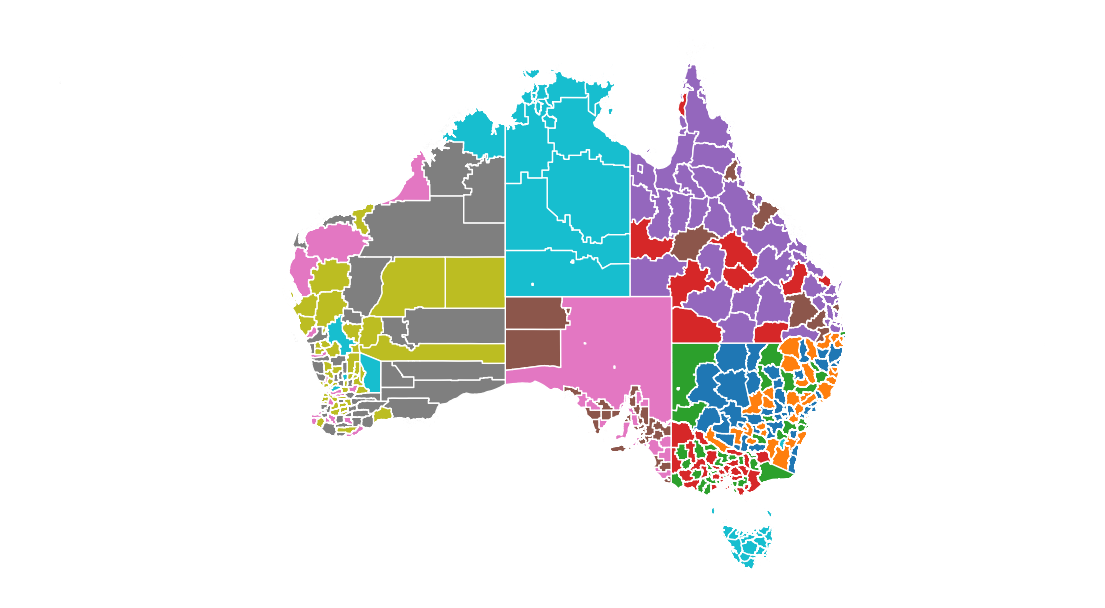

In [291]:
attrs_name=["Total"]
w = libpysal.weights.Queen.from_dataframe(acc_2022_lga)
n_clusters = 5
floor = 1
trace = False
islands = "increase"

model = spopt.region.Skater(
    acc_2022_lga,
    w,
    attrs_name,
    n_clusters=n_clusters,
    floor=floor,
    trace=trace,
    islands=islands,
    spanning_forest_kwds=spanning_forest_kwds
)
model.solve()

acc_2022_lga.plot(figsize=(14, 24), column="LGA_CODE23", categorical=True, edgecolor="w").axis("off");

In [ ]:
Within states, we expect to find expansion in spending areas
as big cities’ population exodus during COVID